In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
np.random.seed(0)

In [2]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


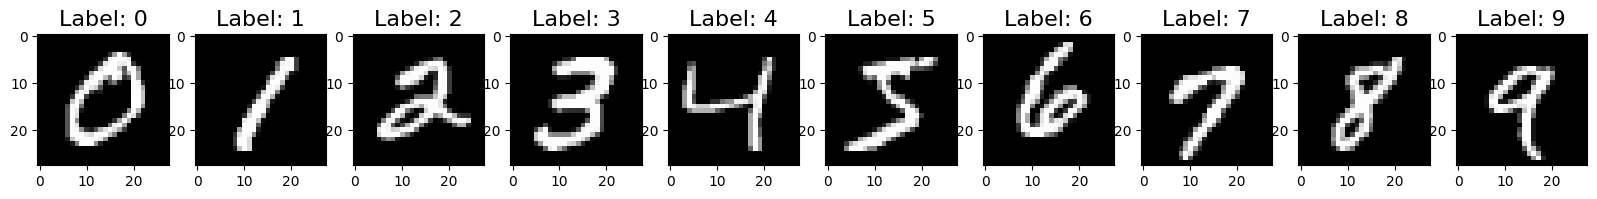

In [4]:
num_classes = 10
f,ax = plt.subplots(1,num_classes,figsize=(20,20))
for i in range(0,num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title("Label: {}".format(i),fontsize=16)

In [6]:
for i in range(10):
    print(y_train[i])


5
0
4
1
9
2
1
3
1
4


In [7]:
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [8]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)

(60000, 784)


In [11]:
model = Sequential()
model.add(Dense(units=128,input_shape = (784,),activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
batch_size = 512
epochs = 10
model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6857 - loss: 1.0432
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9298 - loss: 0.2409
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9510 - loss: 0.1707
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9613 - loss: 0.1328
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9676 - loss: 0.1121
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9729 - loss: 0.0922
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9774 - loss: 0.0790
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9796 - loss: 0.0677
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9819 - loss: 0.0600
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9837 - loss: 0.0532


In [13]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Test Loss {}, Test Accuracy {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9713 - loss: 0.0887
Test Loss 0.07824203372001648, Test Accuracy 0.975600004196167


In [14]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.27898181e-06 2.51700590e-06 1.52761186e-05 ... 9.99901116e-01
  5.06648803e-07 4.64329969e-06]
 [1.29171731e-08 2.97125625e-05 9.99815941e-01 ... 2.61851318e-09
  6.52232643e-07 1.81938731e-12]
 [5.40879364e-06 9.99193370e-01 9.93046997e-05 ... 5.63213311e-04
  3.14612880e-05 1.42429974e-06]
 ...
 [2.57508459e-10 3.35752648e-09 1.47780205e-10 ... 6.76602349e-06
  4.54559554e-08 3.74641877e-06]
 [4.19777325e-06 7.40206269e-06 1.18511231e-07 ... 2.81946154e-06
  3.01437140e-05 8.00428168e-09]
 [6.38368425e-09 1.75660163e-11 9.81671633e-10 ... 1.24287134e-11
  8.48133119e-10 9.20222232e-13]]
[7 2 1 ... 4 5 6]


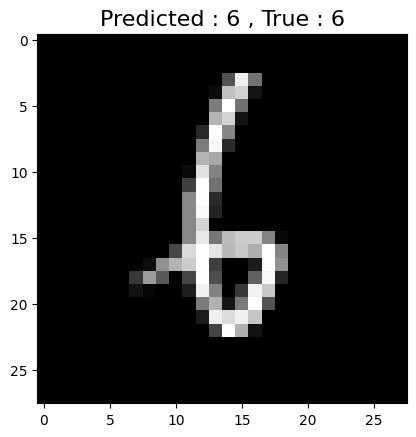

In [15]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test,axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted : {} , True : {}".format(y_sample_pred_class,y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28),cmap='gray')

Text(0.5, 1.0, 'Confusion Matrix')

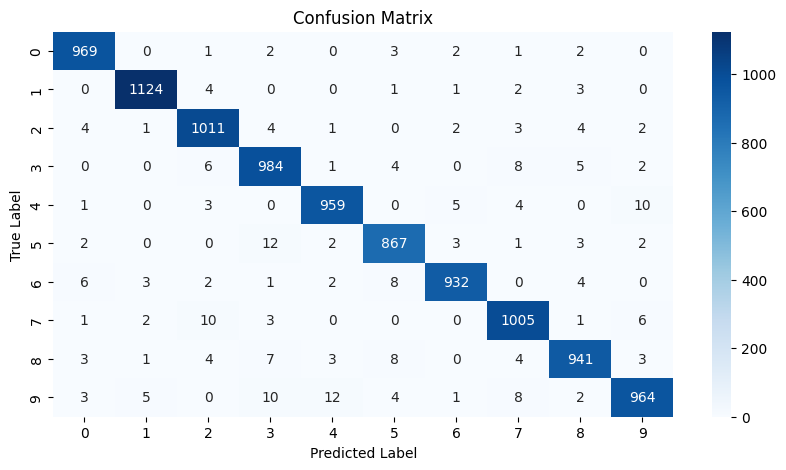

In [16]:
confusion_mtx = confusion_matrix(y_true,y_pred_classes)
fig , ax =plt.subplots(figsize=(10,5))
ax = sns.heatmap(confusion_mtx,annot=True,fmt='d',ax=ax,cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

In [17]:
errors = (y_pred_classes - y_true !=0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [18]:
y_pred_errors_probability = np.max(y_pred_errors,axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors,y_true_errors,axis=1))
diff_errors_pred_true = y_pred_errors_probability-true_probability_errors

sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

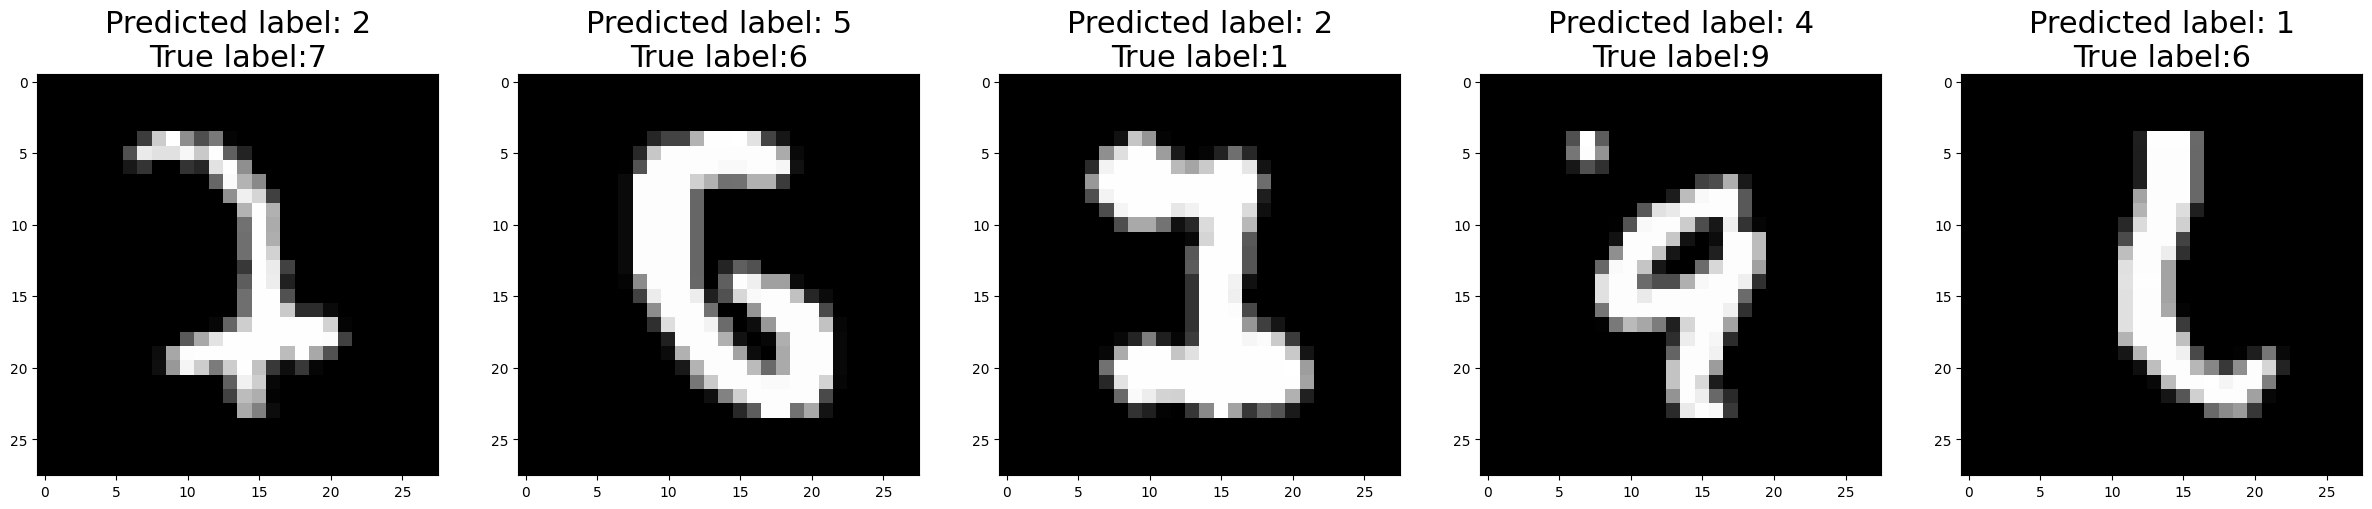

In [19]:
num = len(top_idx_diff_errors)
f,ax = plt.subplots(1,num,figsize = (30,30))

for i in range(0,num):
    idx = top_idx_diff_errors[i]
    sample = x_test_errors[idx].reshape(28,28)
    y_t = y_true_errors[idx]
    y_p = y_pred_classes_errors[idx]
    ax[i].imshow(sample,cmap='gray')
    ax[i].set_title("Predicted label: {}\nTrue label:{}".format(y_p,y_t),fontsize=22)